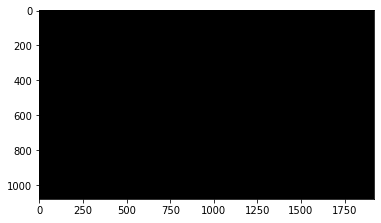

In [10]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

n=1920
m=1080

pil_im = Image.new('RGB', (n, m))

np_im = np.asarray(pil_im)
imshow(np_im)

In [11]:
#TODO: gestire i crop che sono troppo piccoli quando le dimensioni non quagliano con l'immagine originale (agire sul sizes a runtime??)
#TODO: usare tecniche come la regola dei terzi & co
#TODO: fare in modo di poter fare plug di ulteriori detector
def make_crop_coordinates_nhz(image, ratio_str):
    if ratio_str == "16_9":
        ratio = 0.5625
    if ratio_str == "4_3":
        ratio = 0.75
    if ratio_str == "1_1":
        ratio = 1
    if ratio_str == "9_16":
        ratio = 1.7777
    if ratio_str == "3_4":
        ratio = 1.3333
    height = image.shape[0]
    width = image.shape[1]
    coodinates = []
    shorter_dimension = min(width, height)
    position_step = shorter_dimension / 80
    if(ratio <= 1):
        sizes = [width * 0.6,width * 0.7,width * 0.8, width * 0.9, width]
    else:
        sizes = [width * 0.1,width * 0.2,width * 0.3, width * 0.4, width * 0.5]
    for size in sizes:
        position_width = 0
        crop_height = int(size * ratio)
        crop_width = int(size)
        while True:
            position_height = 0
            while True:
                if position_height + crop_height > height:
                    break
                    
                new_coord = (position_width, position_height,
                                   position_width + int(size), position_height + crop_height)
                coodinates.append(new_coord)
                #print(new_coord)
                #print("INCREASING HEIGHT")
                position_height += position_step
                
            position_width += position_step
            #print("INCREASING WIDTH")
            if position_width + crop_width > width:
                #print("**********************")
                break
            
    return coodinates

(1080, 1920, 3)


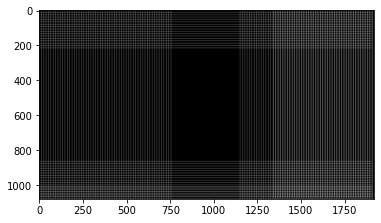

In [13]:
from PIL import ImageFont, ImageDraw, ImageEnhance


pil_im = Image.new('RGB', (n, m))
np_im = np.asarray(pil_im)

draw = ImageDraw.Draw(pil_im)

print(np_im.shape)

for bbox in make_crop_coordinates_nhz(np_im,"4_3"):    
    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

imshow(np.asarray(pil_im))

In [64]:
hull = [rect1_1, rect1_2,rect2_1, rect2_2]
print(hull)

[(60, 60), (160, 160), (360, 160), (460, 260)]


### Minimum enclosing rectangle

[(60, 60), (460, 60), (460, 260), (60, 260)]


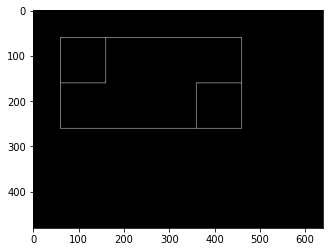

In [65]:
import numpy as np

def bounding_box(coords):

    min_x = 100000 # start with something much higher than expected min
    min_y = 100000
    max_x = -100000 # start with something much lower than expected max
    max_y = -100000

    for item in coords:
        if item[0] < min_x:
            min_x = item[0]

        if item[0] > max_x:
            max_x = item[0]

        if item[1] < min_y:
            min_y = item[1]

        if item[1] > max_y:
            max_y = item[1]

    return [(min_x,min_y),(max_x,min_y),(max_x,max_y),(min_x,max_y)]

crop = bounding_box(hull)
print(crop)

np_im = np.asarray(pil_im)

draw = ImageDraw.Draw(pil_im)

#for bbox in make_crop_coordinates(np_im):    
#    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

rect1_1 = (60, 60)
rect1_2 = (160, 160)

rect2_1 = (360, 160)
rect2_2 = (460, 260)
draw.rectangle((crop[0], crop[2]),  outline="white")

imshow(np.asarray(pil_im))


### Calculate crop value

In [82]:
pil_im = Image.new('L', (10, 10))
np_im = np.asarray(pil_im)

draw = ImageDraw.Draw(pil_im)

#for bbox in make_crop_coordinates(np_im):    
#    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

rect1_1 = (1, 1)
rect1_2 = (3, 3)

rect2_1 = (5, 5)
rect2_2 = (7, 7)
draw.rectangle((rect1_1, rect1_2),  fill = "white", outline="white")
draw.rectangle((rect2_1, rect2_2),  fill = "white", outline="white")


pil_im=pil_im.crop((2,2,6,6))


print(np.sum(np.asarray(pil_im)))

[[  0   0   0   0   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
1275
